# Semi-discrete operator spectra for nodal tensor-product schemes

In [2]:
using CLOUD;
using Plots; pyplot()
results_path = "results/advection_spectra_nodal/";
plots_path = "plots/";

In [19]:
θ = π/4
a = sqrt(2)
A = 1.0  # amplitude
L = 1.0  # domain length
k = (2*π/L, 2*π/L)  # wave number
T = 1.0/(a*max(abs(cos(θ)),abs(cos(θ))))  # end time
initial_data = InitialDataSine(A,k)
conservation_law_central = linear_advection_equation((a*cos(θ),a*sin(θ)),λ=0.0);
conservation_law_upwind = linear_advection_equation((a*cos(θ),a*sin(θ)),λ=1.0);

In [20]:
M = 4
p = 4
p_map = p
form = SplitConservationForm()
mesh_strategy = ZigZag()
strategy=Lazy()

reference_approximation =ReferenceApproximation(
    CollapsedSEM(p), Tri(),
    mapping_degree=p_map);
mesh = warp_mesh(uniform_periodic_mesh(
    reference_approximation.reference_element, 
    ((0.0,L),(0.0,L)), (M,M), strategy=mesh_strategy), 
    reference_approximation.reference_element, 0.2)
spatial_discretization = SpatialDiscretization(mesh, 
    reference_approximation);
solver_central = Solver(conservation_law_central, 
    spatial_discretization, form, strategy)
solver_upwind = Solver(conservation_law_upwind, 
    spatial_discretization, form,strategy);
visualize(spatial_discretization,"./", "mesh.pdf", plot_volume_nodes=false, grid_lines=true)

In [21]:
r = prod(get_dof(spatial_discretization,conservation_law_central))-2
tol = 1.0e-16

linear_analysis_central = LinearAnalysis(results_path,
    conservation_law_central, spatial_discretization, 
    LinearResidual(solver_central), r=r, tol=tol,
    use_data=false, name="central")
linear_results_central = analyze(linear_analysis_central)
save_analysis(linear_analysis_central,linear_results_central)

linear_analysis_upwind = LinearAnalysis(results_path,
    conservation_law_upwind, spatial_discretization, 
    LinearResidual(solver_upwind), r=r, tol=tol,
    use_data=false, name="upwind")
linear_results_upwind = analyze(linear_analysis_upwind);
save_analysis(linear_analysis_upwind,linear_results_upwind)

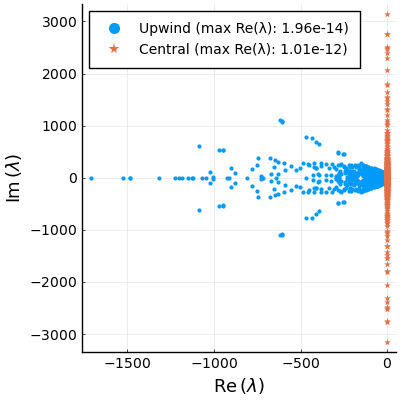

In [23]:
plot_spectrum([linear_results_upwind.λ, linear_results_central.λ], plots_path, ylabel="\\lambda", title="spectrum_nodal_p4m4.pdf")